# Dataset Utils

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from util.dataset_util import get_data_from_csv

Suppose we have a DaCapo benchmark for JVM load testing. For example, the following command runs `avrora` benchmark `5` times and saves Garbage Collector logs to `gc-avrora.txt`.

```
export JVM_OPTS="-XX:+UseParallelGC -Xmx32g -Xms32g --XX:+UseParallelGC -XX:ParallelGCThreads=16 -XX:MaxTenuringThreshold=10 -XX:SurvivorRatio=130 -XX:TargetSurvivorRatio=66"
export BM="avrora"

java $JVM_OPTS -cp dacapo-bench.jar  -Xlog:gc=debug:file=gc-$BM.txt \
-Dvmstat.enable_jfr=yes -Dvmstat.csv=yes Harness -v -n 5 $BM
```

Then we can process the `gc-avrora.txt` with GCViewer ([Download link](http://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download)). The `summary_16_10.csv` filename contains values of the **ParallelGCThreads** and **MaxTenuringThreshold** flags.
```
java -cp gcviewer-1.36.jar com.tagtraum.perf.gcviewer.GCViewer gc-avrora.txt summary_16_10.csv -t SUMMARY
```


## Visualization

In [ ]:
target_goal = "avgGCPause"

x, y, z = get_data_from_csv(
    csv_dir= "/home/vsakovskaya/gc-ml/summaries_avrora", 
    goal = target_goal)

## Default values (avrora)
# x.append(15)
# y.append(16)
# z.append(0.01106)

/tmp/ipykernel_41624/1126020963.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_pivoted = data.pivot("ParallelGCThreads", "MaxTenuringThreshold", "Average GC Pause")


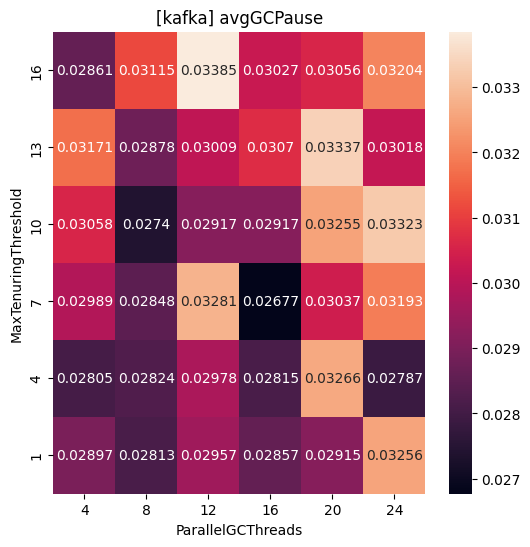

In [4]:
x, y, z = get_data_from_csv(
    csv_dir= "/home/vsakovskaya/gc-ml/summaries_kafka", 
    goal = target_goal)



## Create a synthetic dataset

Многоэкстремальная двумерная функция, построена как сумма N гиперболических потенциалов.

http://conf.nsc.ru/files/conferences/Lyap-100/fulltext/72212/84279/%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2_%D0%90%D0%92_%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%90%D0%98_%D0%90%D0%BB%D0%B3.pdf

### Synthetic dataset 1

/tmp/ipykernel_44888/2798855420.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  curve_data_pivoted = curve_data.pivot("ParallelGCThreads", "MaxTenuringThreshold", "Average GC Pause")


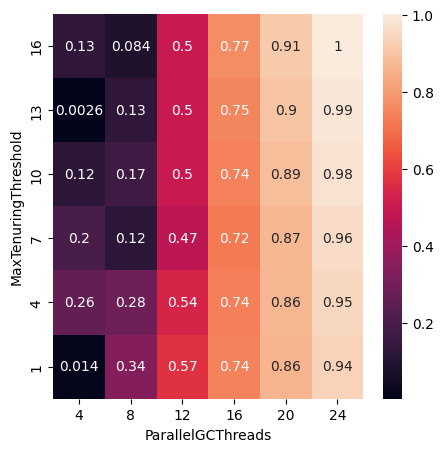

In [9]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 4)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot("ParallelGCThreads", "MaxTenuringThreshold", "Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("avrora_synthetic_saved_states.csv", index=False)

### Synthetic dataset 2

/tmp/ipykernel_44888/283606209.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  curve_data_pivoted = curve_data.pivot("ParallelGCThreads", "MaxTenuringThreshold", "Average GC Pause")


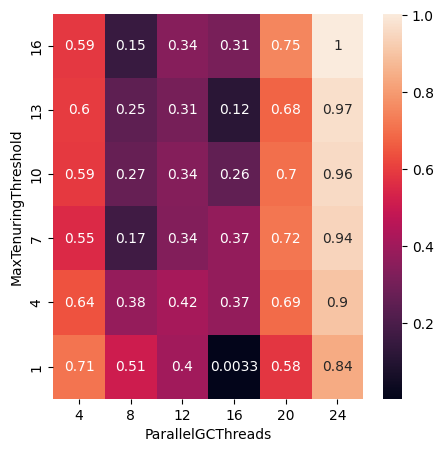

In [8]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 16)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 16)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot("ParallelGCThreads", "MaxTenuringThreshold", "Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("kafka_synthetic_saved_states.csv", index=False)